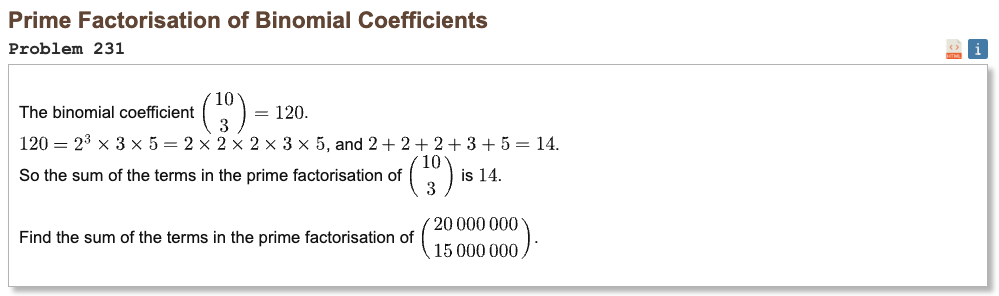

## Initial approach

* the prime factorisation of a binomial coefficient is about how many times each prime appears in it
* instead of expanding the binomial coefficient, break it into factorials and compare prime counts inside those factorials
* for a given prime p, count how many multiples of p, p squared, p cubed, and so on appear inside n! by repeated dividing
* the exponent of p in the binomial coefficient is the exponent in n! minus the exponents in k! and (n minus k)!
* once you know the exponent for each prime, the requested sum is just adding p repeated that many times, which is p times exponent
* generate all primes up to n with a sieve, then loop through them and accumulate the total

In [1]:
import math

def sieve_primes(limit):
    is_prime = bytearray(b"\x01") * (limit + 1)
    if limit >= 0:
        is_prime[0] = 0
    if limit >= 1:
        is_prime[1] = 0
    r = int(math.isqrt(limit))
    for i in range(2, r + 1):
        if is_prime[i]:
            step = i
            start = i * i
            is_prime[start:limit + 1:step] = b"\x00" * (((limit - start) // step) + 1)
    return [i for i in range(2, limit + 1) if is_prime[i]]

def v_p_factorial(n, p):
    s = 0
    while n:
        n //= p
        s += n
    return s

def solve(n=20_000_000, k=15_000_000):
    primes = sieve_primes(n)
    total = 0
    nk = n - k
    for p in primes:
        e = v_p_factorial(n, p) - v_p_factorial(k, p) - v_p_factorial(nk, p)
        if e:
            total += p * e
    return total

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 7526965179680
CPU times: user 727 ms, sys: 17.4 ms, total: 744 ms
Wall time: 783 ms
